In [85]:
import pandas as pd


In [2]:
file_thermo = "../results/2021-01-12/NOG_ogt_70_81.emapper.annotations"
file_meso = "../results/2021-01-12/NOG_ogt_4_15.emapper.annotations"

#! head $file_meso 

df_thermo = pd.read_table(file_thermo )
df_meso   = pd.read_table(file_meso)

df_all = pd.concat([df_meso, df_thermo], ignore_index=True)

In [3]:
df_all.head(5)

,#query_name,seed_eggNOG_ortholog,seed_ortholog_evalue,seed_ortholog_score,best_tax_level,Preferred_name,GOs,EC,KEGG_ko,KEGG_Pathway,...,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,taxonomic scope,eggNOG OGs,best eggNOG OG,COG Functional cat.,eggNOG free text desc.
0,A0A1I1QTV5,1117315.AHCA01000008_gene4130,0.000000e+00,1464.1,Pseudoalteromonadaceae,topA,"GO:0003674,GO:0003824,GO:0003916,GO:0003917,GO...",5.99.1.2,ko:K03168,NaN,...,NaN,"ko00000,ko01000,ko03032,ko03400",NaN,NaN,NaN,Bacteria,"1MUFZ@1224,1RNZ2@1236,2Q04I@267888,COG0550@1,C...",NA|NA|NA,L,Releases the supercoiling and torsional tensio...
1,A0A1I1EJD3,87626.PTD2_13059,6.400000e-69,266.9,Pseudoalteromonadaceae,ispF,"GO:0003674,GO:0003824,GO:0005488,GO:0005515,GO...","2.1.1.228,2.7.7.60,4.6.1.12","ko:K00554,ko:K00991,ko:K01770,ko:K12506","ko00900,ko01100,ko01110,ko01130,map00900,map01...",...,"RC00002,RC00003,RC00334,RC01440","ko00000,ko00001,ko00002,ko01000,ko03016",NaN,NaN,iPC815.YPO3360,Bacteria,"1MVHA@1224,1S3RQ@1236,2Q23B@267888,COG0245@1,C...",NA|NA|NA,I,Involved in the biosynthesis of isopentenyl di...
2,A0A1J0GEE6,931276.Cspa_c06990,7.800000e-145,520.0,Clostridiaceae,moaA,NaN,4.1.99.22,ko:K03639,"ko00790,ko01100,ko04122,map00790,map01100,map0...",...,RC03420,"ko00000,ko00001,ko01000",NaN,NaN,NaN,Bacteria,"1TP89@1239,247PP@186801,36EQA@31979,COG2896@1,...",NA|NA|NA,H,"Catalyzes the cyclization of GTP to (8S)-3',8-..."
3,Q6LTY3,298386.PBPRA0829,9.100000e-192,676.0,Vibrionales,apbE,NaN,2.7.1.180,ko:K03734,NaN,...,NaN,"ko00000,ko01000",NaN,NaN,NaN,Bacteria,"1MW6K@1224,1RNMZ@1236,1XSQ4@135623,COG1477@1,C...",NA|NA|NA,H,Flavin transferase that catalyzes the transfer...
4,M9R2L0,391626.OAN307_c02110,1.500000e-266,924.9,Alphaproteobacteria,argH,"GO:0003674,GO:0003824,GO:0004056,GO:0005575,GO...",4.3.2.1,ko:K01755,"ko00220,ko00250,ko01100,ko01110,ko01130,ko0123...",...,"RC00445,RC00447","ko00000,ko00001,ko00002,ko01000,ko04147",NaN,NaN,NaN,Bacteria,"1MUTU@1224,2TR4H@28211,COG0165@1,COG0165@2",NA|NA|NA,E,argininosuccinate lyase


In [4]:
# Get the best OGs
for i, row in df_all.iterrows():

    for ogs in row['eggNOG OGs'].split(','):
        score = int(ogs.split('@')[1])
        if score == 1:
            df_all.loc[i,('best eggNOG OG')] = ogs.split('@')[0]

In [5]:
print(df_all['best eggNOG OG'].unique()[0])

COG0550


In [6]:



print(df_all[df_all['best eggNOG OG']=='COG0550']['OGT'])

KeyError: 'OGT'

In [88]:
from Bio import SeqIO
import os

dir_ = '/mnt/Archive/Data_Sets/OGT/ogt_classes'

fasta_thermo = os.path.join(dir_,'ogt_70_81.fasta')
fasta_meso = os.path.join(dir_,'ogt_4_15.fasta')
dict_fasta_ogt = {}
dict_fasta_seq = {}
for name in [fasta_meso, fasta_thermo]:
    for rec in SeqIO.parse(name, 'fasta'):
        dict_fasta_ogt[rec.id] = rec.description.split()[-1]
        dict_fasta_seq[rec.id] = str(rec.seq)

In [9]:
print(dict_fasta_ogt['Q6LTY3'])

13.0


In [10]:
temperatures=[]
for i in df_all['#query_name']:
    temperatures.append(dict_fasta_ogt[i])

In [11]:
sequences = []
for i in df_all['#query_name']:
    sequences.append(dict_fasta_seq[i])

In [12]:
df_all['OGT'] = temperatures
df_all['seq'] = sequences

In [13]:
# Creating fasta files with different ogts
path = "../results/OG_fasta"
for i, key in enumerate(df_all['best eggNOG OG'].unique()):
    
    df_tmp = df_all[df_all['best eggNOG OG']== key]
    f = open(os.path.join(path, key+'_'+ str(len(df_tmp))+'.fasta'), 'w')
    for index, row in df_tmp.iterrows():
        f.write(">{} {}\n{}\n".format(row['#query_name'], row['OGT'], row['seq']))
    f.close()

In [25]:
import subprocess
path_ali="../results/OG_ali"
path_dist="../results/OG_dist_mat"
path_fasta="../results/OG_fasta"
for file_name in os.listdir(path_fasta):

    if int(file_name.split('_')[1].split('.')[0]) > 10:
        results = subprocess.run(["clustalo", "-i", os.path.join(path_fasta,file_name), "--distmat-out", os.path.join(path_dist,file_name.split('.')[0]+".mat"), '-o', os.path.join(path_ali,file_name.split('.')[0]+".ali")], capture_output=True, text=True, shell=True)
        print('stdout', results.stdout)

TypeError: __init__() got an unexpected keyword argument 'capture_output'

In [76]:
! clustalo -i "../results/OG_fasta/COG0066_52.fasta" --distmat-out "COG0066_52.mat" -o "COG0066_52.ali" --full --use-kimura --force

In [107]:
with open("COG0066_52.mat", "r") as f:
    string = f.read()
dict_dist ={}
for i in string.split('\n')[1:-1]:
    l = i.split(" ")
    l_ = []
    for j in l[1:]:
        try:
            l_.append(float(j))
        except:
            pass
        
    dict_dist[l[0]] = l_
df_dist = pd.DataFrame(dict_dist, index=dict_dist.keys())

In [78]:
df_dist.mean()

A0A1Y5EEK0    0.635697
A0A090IPI7    0.658539
A0A0F5PXS8    0.667851
K4IDE7        0.669622
A1SVE8        0.675739
A0A1H4E8K0    0.650931
D4ZDV7        0.661905
A0A1M7FHC4    0.674182
M9RFT1        0.806439
A4C0Z1        0.690892
M9RA62        0.713788
A0A0M5TIR9    0.675102
A0A1W1VZE0    0.662105
A0A099KH96    0.639427
Q47WG1        0.636367
M9RKK4        0.679342
Q1Z4R0        0.660976
A0A1M5FC25    0.679708
A0A1I3AE50    0.684640
A0A099L073    0.656275
A0A1H0FGW8    0.687403
V9S6Q4        0.596340
N6UZZ5        0.579952
D2C7S8        0.612763
Q9ZND4        0.708329
A0A0A7GFM2    0.645830
A0A285NC37    0.572738
A0A1W1VK11    0.638004
Q974Q9        0.603692
A0A0E3MCD3    0.595784
C9RGM0        0.618787
C3MKR6        0.596311
A0A238ZNF9    0.581432
C9RDA0        0.630759
B5IBC3        0.610499
B8E2R0        0.635441
A0A179D6A8    0.572515
B8E2X1        0.590459
F4B8J7        0.592033
W0I667        0.651180
A0A1M6S0J3    0.698602
A0A1J1EIK4    0.690222
C9RG34        0.603245
F2KMY8     

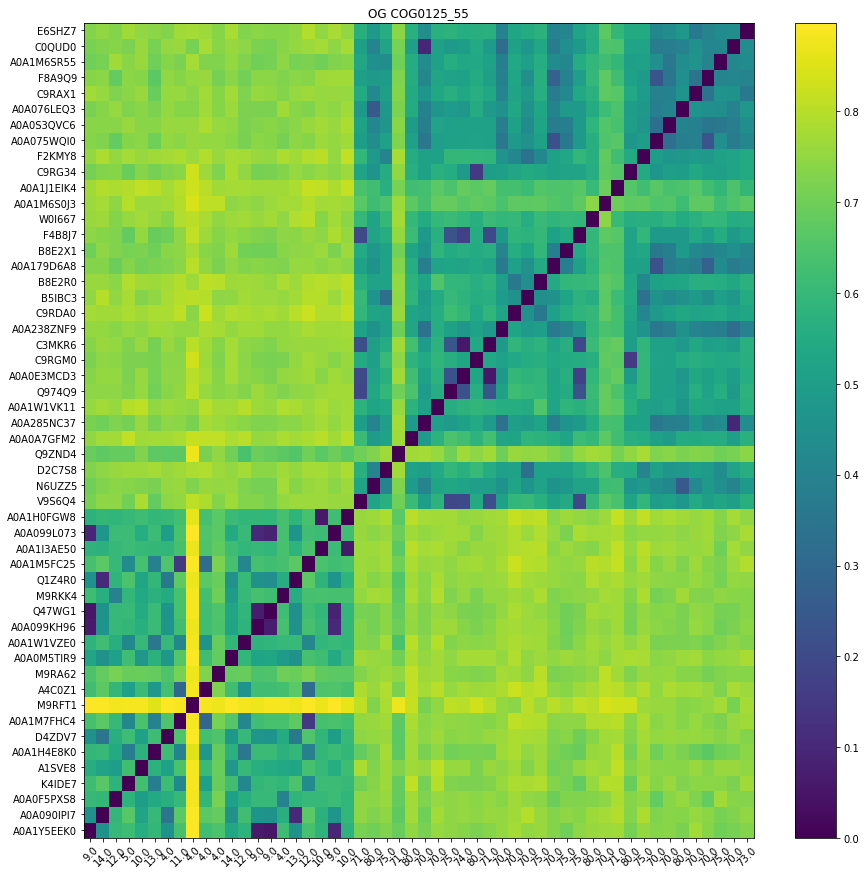

In [108]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt
temperatures_OG  = [dict_fasta_ogt[i] for i in dict_dist.keys()]


plt.figure(figsize=[15,15])
plt.pcolor(df_dist)
plt.yticks(np.arange(0.5, len(df_dist.index), 1), df_dist.index)
plt.xticks(np.arange(0.5, len(df_dist.columns), 1), temperatures_OG, rotation=45)
plt.title("OG COG0125_55")
plt.colorbar()
plt.show()

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import math
from Bio import SeqIO

AAS = 'ACDEFGHIKLMNPQRSTVWYX'

def import_alignment(name):
    dict_alignment_all    = {'id':[], 'ogt':[], 'seq':[]}
    dict_alignment_meso   = {'id':[], 'ogt':[], 'seq':[]}
    dict_alignment_thermo = {'id':[], 'ogt':[], 'seq':[]}

    for rec in SeqIO.parse(name, 'fasta'):
        dict_alignment_all['id'].append(rec.id)
        dict_alignment_all['ogt'].append(float(rec.description.split()[-1]))
        dict_alignment_all['seq'].append(str(rec.seq))

        if float(rec.description.split()[-1]) <= 15:
            dict_alignment_meso['id'].append(rec.id)
            dict_alignment_meso['ogt'].append(float(rec.description.split()[-1]))
            dict_alignment_meso['seq'].append(str(rec.seq))
        else:
            dict_alignment_thermo['id'].append(rec.id)
            dict_alignment_thermo['ogt'].append(float(rec.description.split()[-1]))
            dict_alignment_thermo['seq'].append(str(rec.seq))
    dict_ ={'All':dict_alignment_all, 'Meso':dict_alignment_meso, 'Thermo': dict_alignment_thermo}
    return dict_

def index_aa(seq):
    idx = []
    for i, aa in enumerate(seq):
        if aa is not "-":
            idx.append(i)
    return idx

def aa_at_index(idx, ali):
    list_mutations=[]
    for j in idx:
        tmp=[]
        for i, seq in enumerate(ali['seq']):
            tmp.append(seq[j])
        list_mutations.append(tmp)
    return list_mutations

def prob_mutation(seq, idx, msa_aa):
    total_counts_per_residue = []
    insertion_site = np.zeros((len(idx),))
    for index, res_aa in enumerate(msa_aa):
        count_residue = 1
        for aa in res_aa:
            if aa is not '-':
                count_residue += 1
        total_counts_per_residue.append(count_residue)
        if all(np.array(res_aa) == '-'):
            insertion_site[index] = 1
    
    same_counts_per_residue = []
    for i, res_aa in enumerate(msa_aa):
        count_residue = 1
        for aa in res_aa:
            if aa is seq[idx[i]]:
                count_residue += 1
        same_counts_per_residue.append(count_residue)
   
    return np.array(same_counts_per_residue)/np.array(total_counts_per_residue), insertion_site

def residy_entropy(seq, idx, msa_aa):
    total_counts_per_residue = []
    insertion_site = np.zeros((len(idx),))
    for index, res_aa in enumerate(msa_aa):
        count_residue = 1
        for aa in res_aa:
            if aa is not '-':
                count_residue += 1
        total_counts_per_residue.append(count_residue)
        if all(np.array(res_aa) == '-'):
            insertion_site[index] = 1
    
    entropy_per_residue = []
    for i, res_aa in enumerate(msa_aa):
        counts_aa = {aa:0 for aa in AAS}
        for aa in res_aa:
            if aa is not '-':
                counts_aa[aa] += 1
        counts_aa[seq[idx[i]]] += 1
        entropy=0
        for key in counts_aa.keys():
            tmp = counts_aa[key] / total_counts_per_residue[i] 
            if tmp != 0:
                entropy -= tmp * math.log(tmp, 2)
        entropy_per_residue.append(entropy)
    return np.array(entropy_per_residue), insertion_site

def plot_prob_aa(prob_per_residue, insertions, id_, dict_):
    fig = plt.figure(figsize=[15,15]) 
    patches = plt.bar(np.arange(len(prob_per_residue)), prob_per_residue)
    for i, val in enumerate(insertions):
        if val == 1:
            patches[i].set_facecolor('r')
    plt.title(id_ + ' measured against '+dict_)

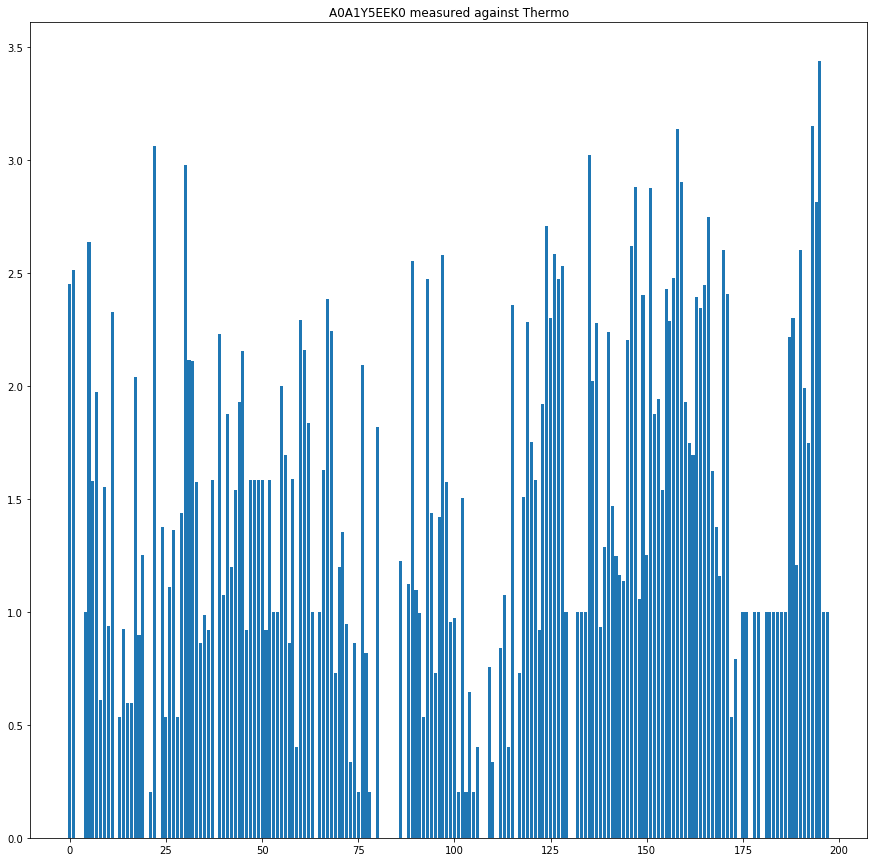

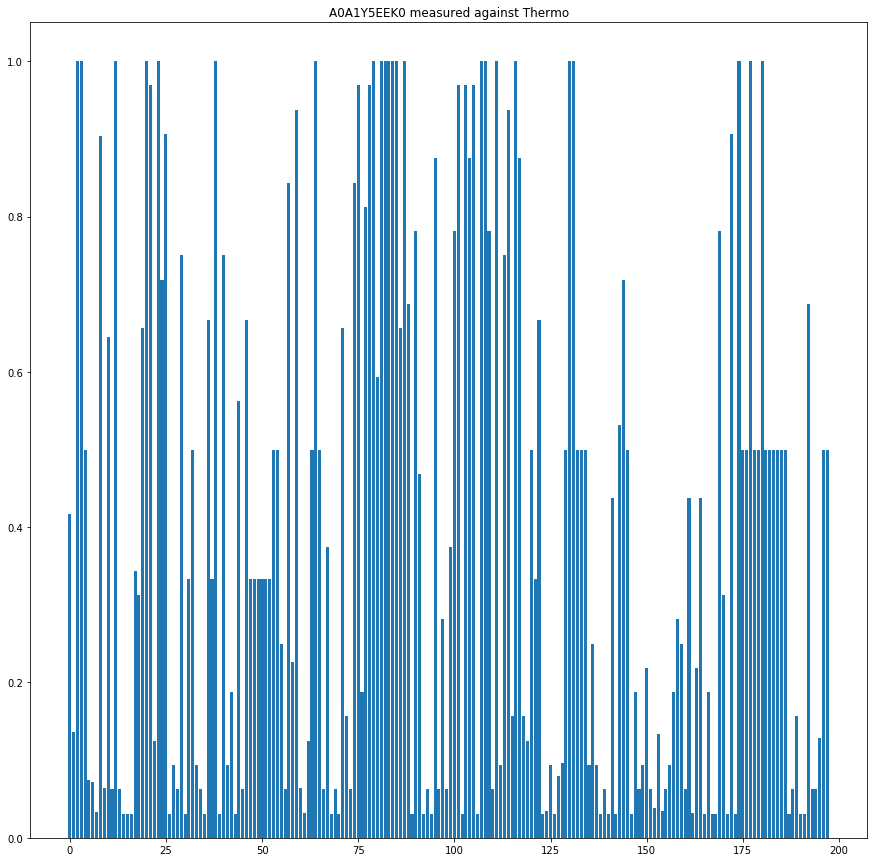

In [131]:
name = "COG0066_52.ali"
dicts = import_alignment(name)
dict_name = 'Thermo'
seq_dict = 'Meso'
seq = dicts[seq_dict]['seq'][0]
id_ = dicts[seq_dict]['id'][0]

index = index_aa(seq)
msa_aa = aa_at_index(index, dicts[dict_name])
prob_per_residue, insertions = residy_entropy(seq, index, msa_aa)
plot_prob_aa(prob_per_residue, insertions, id_, dict_name)
prob_per_residue, insertions = prob_mutation(seq, index, msa_aa)
plot_prob_aa(prob_per_residue, insertions, id_, dict_name)

In [95]:

dicts[dict_name]




{'id': ['A0A1Y5EEK0',
  'A0A090IPI7',
  'A0A0F5PXS8',
  'K4IDE7',
  'A1SVE8',
  'A0A1H4E8K0',
  'D4ZDV7',
  'A0A1M7FHC4',
  'M9RFT1',
  'A4C0Z1',
  'M9RA62',
  'A0A0M5TIR9',
  'A0A1W1VZE0',
  'A0A099KH96',
  'Q47WG1',
  'M9RKK4',
  'Q1Z4R0',
  'A0A1M5FC25',
  'A0A1I3AE50',
  'A0A099L073',
  'A0A1H0FGW8'],
 'ogt': [9.0,
  14.0,
  12.0,
  5.0,
  10.0,
  13.0,
  4.0,
  11.0,
  4.0,
  4.0,
  4.0,
  14.0,
  12.0,
  9.0,
  9.0,
  4.0,
  13.0,
  12.0,
  10.0,
  9.0,
  10.0],
 'seq': ['-------------------------MEKFNTHTGLVVPLDVANVDTDQIIPKQFLQKT-E-----RVGFGVHLFHDSRYLDHAG-------TQVNPDFVINKPEYKDASILLAGENFGCGSSREHAPWALQEYGFKVIIASSFADIFYGNCINVGLLPIKLSE-AEIEQLFKLSA-DAQLMLTVDLPNNTVTC--GELSFKF--SLNEFQQYSLENGV-DSVGWTLDKLDTIKAFEAKMPA---WQ--------------------',
  '-------------------------MSGFKQHTGLVVPLDTANIDTDAIIPKQFLQKV-N-----RTGFGKHLFHDWRFLDDAG-------EQANPEFVMNAPRYQGASILLARENFGCGSSREHAPWALADYGIQVMIAPSFADIFYGNSINNQMIPVRLTD-TEVDEIFQFVEANEGAEINVDLEAMLVTA--NNKQYSF--EIDEFRRHCLLNGL-DNIGLTLQHADKISEYEAKIPS---F

In [83]:
dict_alignment_meso['id']

['H5T9W5',
 'A0A1K9YUZ8',
 'Q6LSW5',
 'A0A0F5Q2C4',
 'A1STW8',
 'Q482J5',
 'A0A0M4U709',
 'A0A154L9H0',
 'A0A1I1P7G1',
 'A0A090IIY1',
 'D4ZLJ4',
 'K7A0E8',
 'A0A1Y5EVE3',
 'A0A1I1Q669',
 'A0A090IRF2']